In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load CSV in DF

In [ ]:
df = pd.read_csv('/home/dmin/code/loic06/Forecasting-Gold-Price/raw_data/Extract_TimeFrame_60_clean.csv',sep=';')

In [48]:
df.head()

,time,open,high,low,close,Basis,Upper,Lower,Up Trend,Down Trend,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,Unnamed: 16
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1790.975815,NaN,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677,NaN
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1792.424234,NaN,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677,NaN
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1793.371810,NaN,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677,NaN
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1795.105129,NaN,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677,NaN
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.398616,NaN,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677,NaN


# Copy pour éviter de tout casser

In [3]:
data = df.copy()
data.head()

,time,open,high,low,close,Basis,Upper,Lower,Up Trend,Down Trend,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,Unnamed: 16
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1790.975815,NaN,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677,NaN
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1792.424234,NaN,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677,NaN
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1793.371810,NaN,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677,NaN
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1795.105129,NaN,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677,NaN
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.398616,NaN,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677,NaN


# Pas de Null detecté

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23112 entries, 0 to 23111
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 23112 non-null  object 
 1   open                 23112 non-null  float64
 2   high                 23112 non-null  float64
 3   low                  23112 non-null  float64
 4   close                23112 non-null  float64
 5   Basis                23112 non-null  float64
 6   Upper                23112 non-null  float64
 7   Lower                23112 non-null  float64
 8   Up Trend             12053 non-null  float64
 9   Down Trend           11059 non-null  float64
 10  KAMA                 23112 non-null  float64
 11  RSI                  23112 non-null  float64
 12  Bollinger Bands %b   23112 non-null  float64
 13  Bollinger BandWidth  23112 non-null  float64
 14  Highest Expansion    23112 non-null  float64
 15  Lowest Contraction   23112 non-null 

# Par simplicité, on enlève ces 3 features

In [5]:
data = data.drop(columns=['Up Trend','Down Trend','Unnamed: 16'])
data.head()

,time,open,high,low,close,Basis,Upper,Lower,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677


# Pas de NaN detecté

In [6]:
data.isna().sum()

time                   0
open                   0
high                   0
low                    0
close                  0
Basis                  0
Upper                  0
Lower                  0
KAMA                   0
RSI                    0
Bollinger Bands %b     0
Bollinger BandWidth    0
Highest Expansion      0
Lowest Contraction     0
dtype: int64

# Etude de la corrélation entre features

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23112 entries, 0 to 23111
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 23112 non-null  object 
 1   open                 23112 non-null  float64
 2   high                 23112 non-null  float64
 3   low                  23112 non-null  float64
 4   close                23112 non-null  float64
 5   Basis                23112 non-null  float64
 6   Upper                23112 non-null  float64
 7   Lower                23112 non-null  float64
 8   KAMA                 23112 non-null  float64
 9   RSI                  23112 non-null  float64
 10  Bollinger Bands %b   23112 non-null  float64
 11  Bollinger BandWidth  23112 non-null  float64
 12  Highest Expansion    23112 non-null  float64
 13  Lowest Contraction   23112 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.5+ MB


# Conversion en datetime

In [49]:
data['time'] = pd.to_datetime(data['time'],utc=True)

KeyError: 'time'

In [9]:
data.head()

,time,open,high,low,close,Basis,Upper,Lower,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
0,2022-01-11 00:00:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677
1,2022-01-11 01:00:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677
2,2022-01-11 02:00:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677
3,2022-01-11 03:00:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677
4,2022-01-11 04:00:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677


<Axes: >

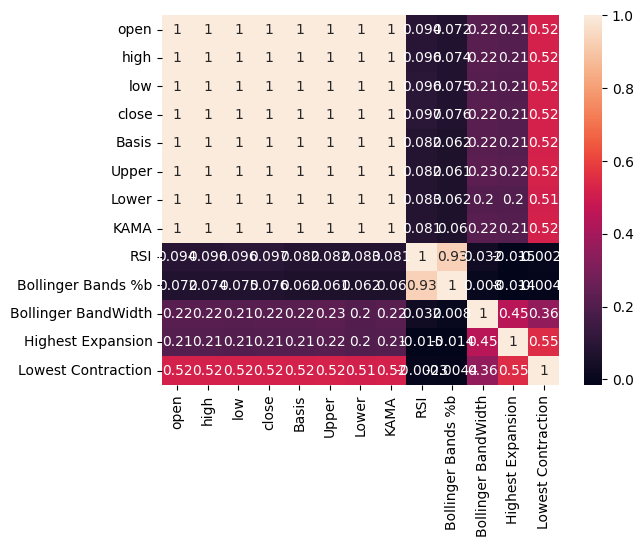

In [10]:
correlation_matrix = data.select_dtypes('float').corr()
sns.heatmap(correlation_matrix,annot=True)

# On vire toutes les features extremement corrélées à notre target 'close'

In [11]:
data = data.drop(columns=['open','high','low','Basis','Upper','Lower'])

<Axes: >

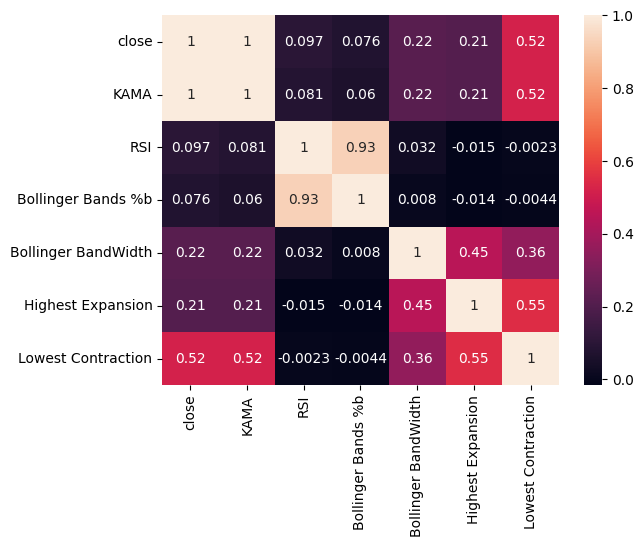

In [12]:
correlation_matrix = data.select_dtypes('float').corr()
sns.heatmap(correlation_matrix,annot=True)

In [13]:
data = data.drop(columns=['KAMA'])

<Axes: >

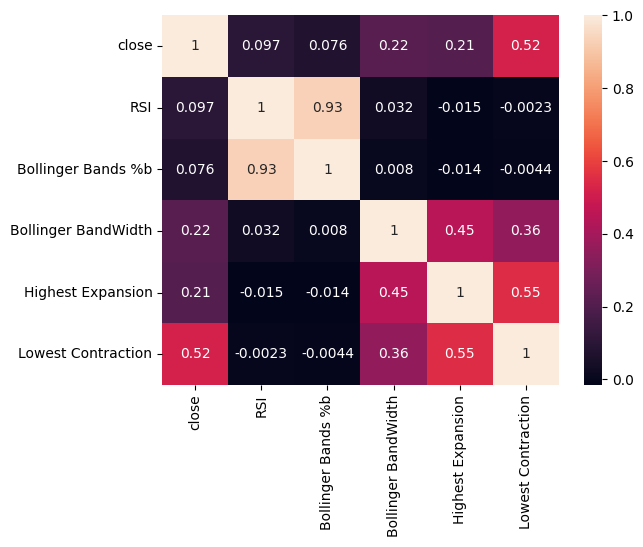

In [14]:
correlation_matrix = data.select_dtypes('float').corr()
sns.heatmap(correlation_matrix,annot=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23112 entries, 0 to 23111
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 23112 non-null  datetime64[ns]
 1   close                23112 non-null  float64       
 2   RSI                  23112 non-null  float64       
 3   Bollinger Bands %b   23112 non-null  float64       
 4   Bollinger BandWidth  23112 non-null  float64       
 5   Highest Expansion    23112 non-null  float64       
 6   Lowest Contraction   23112 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.2 MB


# Push de time en index

In [16]:
data.set_index('time',drop=True,inplace=True)

In [47]:
data.head()

,close,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
time,,,,,,
2022-01-11 00:00:00,1801.18,65.669045,0.831694,0.803134,2.519134,0.332677
2022-01-11 01:00:00,1802.70,69.806836,0.888896,0.826182,2.519134,0.332677
2022-01-11 02:00:00,1804.85,74.665739,0.963492,0.876434,2.519134,0.332677
2022-01-11 03:00:00,1805.18,75.350694,0.925586,0.917716,2.519134,0.332677
2022-01-11 04:00:00,1805.91,76.904655,0.915073,0.952947,2.519134,0.332677


# Création des X et y

In [17]:
X = data.drop(columns='close')
y = data[['close']]
X.head()

,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
time,,,,,
2022-01-11 00:00:00,65.669045,0.831694,0.803134,2.519134,0.332677
2022-01-11 01:00:00,69.806836,0.888896,0.826182,2.519134,0.332677
2022-01-11 02:00:00,74.665739,0.963492,0.876434,2.519134,0.332677
2022-01-11 03:00:00,75.350694,0.925586,0.917716,2.519134,0.332677
2022-01-11 04:00:00,76.904655,0.915073,0.952947,2.519134,0.332677


# Normalisation de nos features numériques

In [ ]:
from sklearn.preprocessing import StandardScaler

rb=StandardScaler()
X[['RSI','Bollinger Bands %b','Bollinger BandWidth','Highest Expansion','Lowest Contraction']] = rb.fit_transform(X[['RSI','Bollinger Bands %b','Bollinger BandWidth','Highest Expansion','Lowest Contraction']])


In [19]:
X.head()

,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
time,,,,,
2022-01-11 00:00:00,0.643806,0.541386,-0.213976,-0.003708,-0.355011
2022-01-11 01:00:00,0.835448,0.650458,-0.185970,-0.003708,-0.355011
2022-01-11 02:00:00,1.060489,0.792697,-0.124909,-0.003708,-0.355011
2022-01-11 03:00:00,1.092213,0.720418,-0.074748,-0.003708,-0.355011
2022-01-11 04:00:00,1.164185,0.700372,-0.031938,-0.003708,-0.355011


In [20]:
y.head()

,close
time,
2022-01-11 00:00:00,1801.18
2022-01-11 01:00:00,1802.70
2022-01-11 02:00:00,1804.85
2022-01-11 03:00:00,1805.18
2022-01-11 04:00:00,1805.91


# Define XGBoost Model

## Train Test split

In [21]:
from sklearn.model_selection import train_test_split

# Split data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

In [ ]:
# Create eval test just for early-stopping purposes (XGBOOST and Deep Learning)
train_size = int(0.8 * len(X))
X_train, X_eval = X[:train_size], X[train_size:]
y_train, y_eval = y[:train_size], y[train_size:]

In [22]:
print(X_train.shape,X_test.shape,X_val.shape)

(16178, 5) (3467, 5) (3467, 5)


# Option 1

In [38]:
# Split data into train, test and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 42  # TEST = 30%
)

# Use the same function above for the validation set
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
)

# Option 2

In [32]:
# Create train, eval, and test sets
train_size = int(0.7 * len(X))
eval_size = int(0.15 * len(X))
X_train, X_eval_test = X[:train_size], X[train_size:]
y_train, y_eval_test = y[:train_size], y[train_size:]

X_val, X_test = X_eval_test[:eval_size], X_eval_test[eval_size:]
y_val, y_test = y_eval_test[:eval_size], y_eval_test[eval_size:]

print("Train shape:", X_train.shape, y_train.shape)
print("Eval shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (16178, 5) (16178, 1)
Eval shape: (3466, 5) (3466, 1)
Test shape: (3468, 5) (3468, 1)


## Model initialisation

In [41]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    max_depth=10, n_estimators=200,
    learning_rate=0.01,
    # stop iterating when eval loss increases 5 times in a row
    early_stopping_rounds=5,
    eval_metric="mae"
)

## Training

In [42]:
xgb_reg.fit(X_train, y_train,
    # evaluate loss at each iteration
    eval_set=[(X_train, y_train), (X_val, y_val)],
)

[0]	validation_0-mae:536.15656	validation_1-mae:539.44307
[1]	validation_0-mae:532.23075	validation_1-mae:535.52475
[2]	validation_0-mae:528.35140	validation_1-mae:531.65274
[3]	validation_0-mae:524.52008	validation_1-mae:527.81677
[4]	validation_0-mae:520.73169	validation_1-mae:524.02229
[5]	validation_0-mae:517.02243	validation_1-mae:520.31694
[6]	validation_0-mae:513.31763	validation_1-mae:516.61231
[7]	validation_0-mae:509.68956	validation_1-mae:512.99920
[8]	validation_0-mae:506.07719	validation_1-mae:509.39852
[9]	validation_0-mae:502.52788	validation_1-mae:505.86726
[10]	validation_0-mae:498.97560	validation_1-mae:502.33130
[11]	validation_0-mae:495.44027	validation_1-mae:498.80658
[12]	validation_0-mae:491.91703	validation_1-mae:495.28926
[13]	validation_0-mae:488.42171	validation_1-mae:491.80075
[14]	validation_0-mae:484.76246	validation_1-mae:488.14636
[15]	validation_0-mae:481.15816	validation_1-mae:484.53171
[16]	validation_0-mae:477.60634	validation_1-mae:480.98449
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

# Leraning curves

# Predict

In [43]:
X_test

,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
time,,,,,
2022-10-21 14:00:00,0.473633,0.568290,-0.035951,-0.035657,0.344043
2023-09-07 16:00:00,-0.445545,-0.306948,-0.753003,-1.134518,-1.057032
2022-09-08 21:00:00,-0.754719,-0.759873,0.326607,-0.404220,-0.551913
2023-12-18 13:00:00,-0.085731,0.044038,-0.190700,1.662360,0.029804
2022-10-26 12:00:00,0.785748,0.644599,0.828953,0.866704,-0.377768
...,...,...,...,...,...
2025-10-31 11:00:00,-0.132099,-0.330537,0.227301,0.868398,4.416675
2025-02-12 19:00:00,0.503556,0.620429,-0.120048,-0.119275,1.012178
2024-07-08 13:00:00,-0.384021,-0.683526,0.014225,-0.417652,-1.447695


In [46]:
y_pred = xgb_reg.predict(X_test)
pd.DataFrame(y_pred)

,0
0,1821.764404
1,1987.775269
2,1928.986328
3,2066.052246
4,1873.808960
...,...
3462,3788.209473
3463,2802.016113
3464,2311.793945
3465,3407.976074


In [45]:
y_test

,close
time,
2022-10-21 14:00:00,1631.30
2023-09-07 16:00:00,1918.09
2022-09-08 21:00:00,1706.79
2023-12-18 13:00:00,2023.64
2022-10-26 12:00:00,1668.84
...,...
2025-10-31 11:00:00,4007.45
2025-02-12 19:00:00,2901.00
2024-07-08 13:00:00,2375.37
